# Non-negative Matrix Factorization (NMF)

Non-negative Matrix Factorization (NMF) is a method used in topic modeling to discover hidden topics in a collection of documents.

1) Document-Term Matrix: First, a matrix is created where rows represent documents and columns represent words, showing how often each word appears in each document.
2) Factorization: NMF breaks this matrix into two smaller matrices:
    W: Shows how each document relates to different topics.
    H: Shows which words are associated with each topic.
3) Interpretation: The result reveals the main topics in the documents and which documents are related to those topics.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

In [ ]:
# Step 1: Load tokenized dataset
df = pd.read_pickle('tokenized_tweets_lemmatzation.pkl')

# Ensure tokenized texts are lists of tokens
tokenized_texts = df['text'].tolist()
print(f"Sample tokenized texts: {tokenized_texts[:2]}")

# Step 2: Create Gensim Dictionary and Corpus
dictionary = Dictionary(tokenized_texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
print(f"Number of tokens in dictionary: {len(dictionary)}")

# Create corpus (bag-of-words representation for coherence calculation)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
print(f"Sample corpus: {corpus[:2]}")

# Step 3: TF-IDF Vectorization
# Convert tokenized lists into strings for TF-IDF
df['text'] = df['text'].apply(lambda x: " ".join(x))

# Align TF-IDF with Gensim Dictionary by passing the vocabulary
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english',
                                   vocabulary={word: idx for idx, word in dictionary.items()})
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

Sample tokenized texts: [['american', 'harem'], ['guy', 'resigned', 'yet', 'liberal', 'hypocrisy']]
Number of tokens in dictionary: 11285
Sample corpus: [[(0, 1)], [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]
TF-IDF matrix shape: (135343, 11285)


In [ ]:
# Step 3: Test Coherence for Different Numbers of Topics
coherence_scores = []

for num_topics in range(5, 32):  # Test topic numbers from 5 to 31
    # Apply NMF
    nmf_model = NMF(n_components=num_topics, random_state=42)
    W = nmf_model.fit_transform(tfidf_matrix)
    H = nmf_model.components_

    # Extract Topics
    feature_names = tfidf_vectorizer.get_feature_names_out()
    topics = [
        [feature_names[i] for i in topic.argsort()[:-11:-1]]  # Top 10 words per topic
        for topic in H
    ]

    # Compute Coherence Score
    coherence_model = CoherenceModel(
        topics=topics,             # List of top words per topic
        texts=tokenized_texts,     # Tokenized texts
        dictionary=dictionary,     # Gensim dictionary
        coherence='c_v'            # Coherence metric
    )
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((num_topics, coherence_score))
    print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score}")

Num Topics: 5, Coherence Score: 0.578200372047546
Num Topics: 6, Coherence Score: 0.5715539780229034
Num Topics: 7, Coherence Score: 0.5582507837593375
Num Topics: 8, Coherence Score: 0.5299420189832018
Num Topics: 9, Coherence Score: 0.5865291018881434
Num Topics: 10, Coherence Score: 0.6244425997449741
Num Topics: 11, Coherence Score: 0.6136742967069716
Num Topics: 12, Coherence Score: 0.5958161768784201
Num Topics: 13, Coherence Score: 0.6063870272674667
Num Topics: 14, Coherence Score: 0.5968798294766222
Num Topics: 15, Coherence Score: 0.5662211843951857
Num Topics: 16, Coherence Score: 0.537740323399813
Num Topics: 17, Coherence Score: 0.5396375389784877
Num Topics: 18, Coherence Score: 0.5463200136175956
Num Topics: 19, Coherence Score: 0.5387396970874702
Num Topics: 20, Coherence Score: 0.5466714363770862
Num Topics: 21, Coherence Score: 0.5221893695277838
Num Topics: 22, Coherence Score: 0.5163663418150357
Num Topics: 23, Coherence Score: 0.5199430681894595
Num Topics: 24, Coh

    Num Topics  Coherence Score
0            5         0.578200
1            6         0.571554
2            7         0.558251
3            8         0.529942
4            9         0.586529
5           10         0.624443
6           11         0.613674
7           12         0.595816
8           13         0.606387
9           14         0.596880
10          15         0.566221
11          16         0.537740
12          17         0.539638
13          18         0.546320
14          19         0.538740
15          20         0.546671
16          21         0.522189
17          22         0.516366
18          23         0.519943
19          24         0.519516
20          25         0.524102
21          26         0.520531
22          27         0.509681
23          28         0.536923
24          29         0.518164
25          30         0.514180
26          31         0.505572


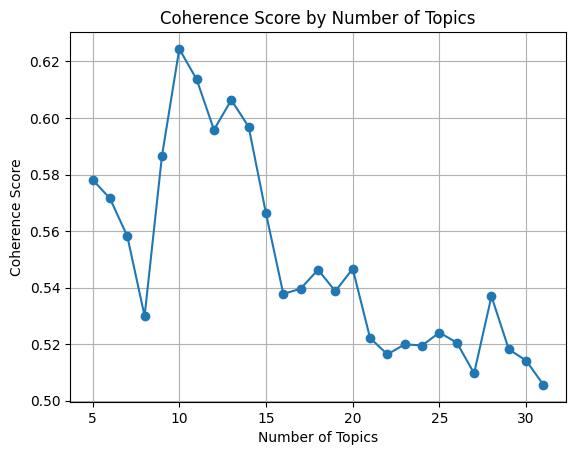

In [ ]:
# Display Results
coherence_df = pd.DataFrame(coherence_scores, columns=['Num Topics', 'Coherence Score'])
print(coherence_df)

# Plot Results
import matplotlib.pyplot as plt

plt.plot(coherence_df['Num Topics'], coherence_df['Coherence Score'], marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score by Number of Topics')
plt.grid()
plt.show()

Final Topics with 10 Topics:
Topic 0: time, year, person, silence, breaker, magazine, voted, chose, right, glad
Topic 1: woman, men, black, say, russell, simmons, kelly, believe, story, need
Topic 2: latest, daily, thanks, news, thelastjedi, netneutrality, medium, technology, world, business
Topic 3: trump, moment, donald, cnn, resign, moore, president, impeach, accuser, sex
Topic 4: woody, allen, dylan, farrow, spared, revolution, selective, say, accuser, harvey
Topic 5: sexual, harassment, assault, abuse, misconduct, victim, story, predator, work, amp
Topic 6: movement, men, created, taken, matt, think, damon, need, change, people
Topic 7: like, italy, meh, look, jasondhorowitz, think, story, feel, afraid, dont
Topic 8: backlash, video, liked, ready, wow, koshy, liza, infighting, beat, rose
Topic 9: new, tarana, burke, creator, square, ball, eve, time, drop, year
Topic Distribution:
dominant_topic
6    31214
5    28160
1    26843
3    13029
0    11320
8     6685
2     6119
9     5139

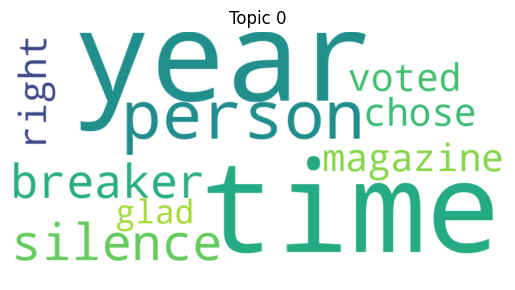

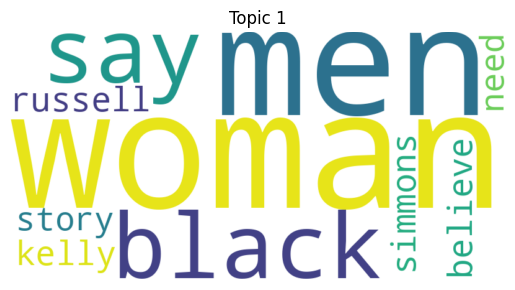

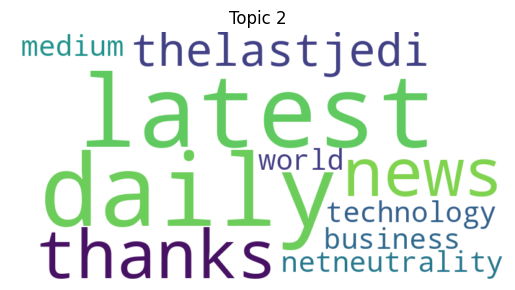

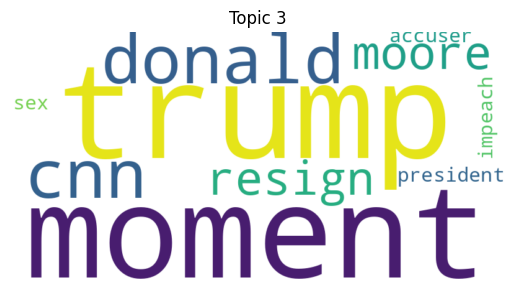

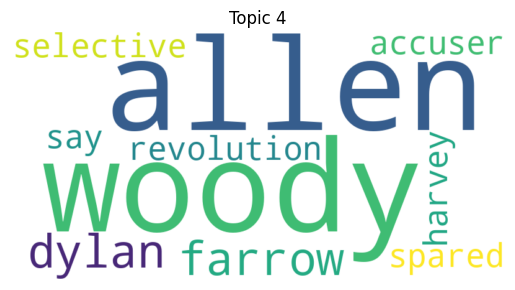

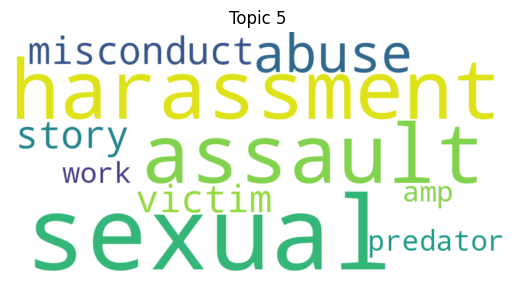

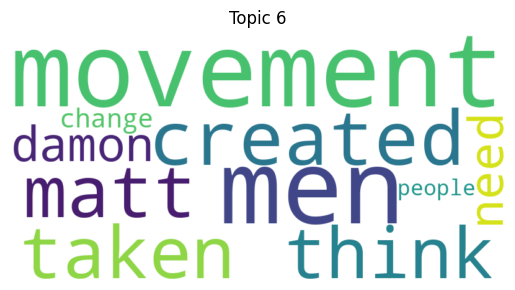

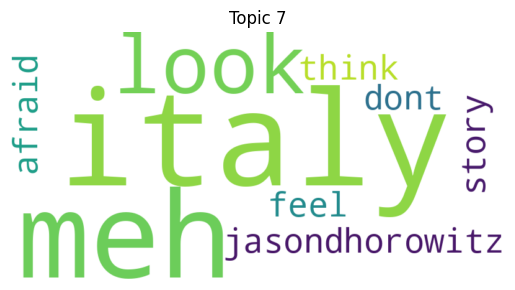

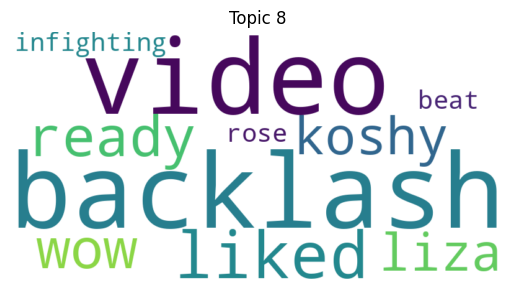

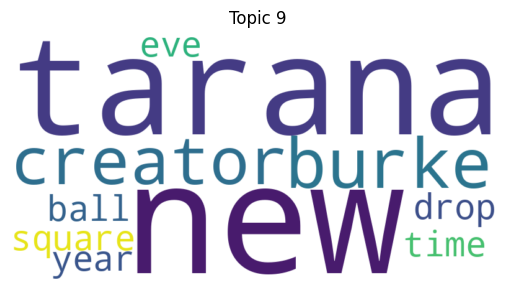

In [ ]:
# Finalize NMF with 10 topics
final_num_topics = 10
nmf_model = NMF(n_components=final_num_topics, random_state=42)
W = nmf_model.fit_transform(tfidf_matrix)
H = nmf_model.components_

# Display Final Topics
feature_names = tfidf_vectorizer.get_feature_names_out()
topics = [
    [feature_names[i] for i in topic.argsort()[:-11:-1]]  # Top 10 words per topic
    for topic in H
]

print("Final Topics with 10 Topics:")
for i, topic in enumerate(topics):
    print(f"Topic {i}: {', '.join(topic)}")

# Assign Dominant Topic to Each Document
df['dominant_topic'] = W.argmax(axis=1)

# Analyze Topic Distribution
topic_distribution = df['dominant_topic'].value_counts()
print("Topic Distribution:")
print(topic_distribution)

# Optional: Visualize Topics with Word Clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, topic in enumerate(topics):
    wordcloud = WordCloud(width=800, height=400,  background_color='white').generate(" ".join(topic))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {i}")
    plt.show()
